# Week 02 Assignment glucose level data


Missing data occurs commonly in many data applications. Especially wearable sensor devices encounter measurement errors resulting in missing data. Although pandas can handle missing data, for instance, to exclude missing data in the descriptive analysis, we might decide to reshape our data to improve quality. We might consider excluding certain rows, columns, or decide to impute our data if we take an argumentative approach. This week we will work with sensor data of a semester 01 project. The data is timeseries related but a lot of sensor errors occurred. First, we inspect the quality data. Then we will work with imputation, interpolation, and smoothing techniques to overcome this issue of the error readings. Finaly we plot the data. Visualization is a method to translate data into information. As a data scientist you should be able to choose an appropiate visualizations. 


Keywords: data loading, data inspection, data exploration, data cleaning, impute data, missing data, timeseries, pandas, visualization, interactive plots, overflow/underflow error

More to read
- https://fennaf.gitbook.io/bfvm22prog1/
- https://towardsdatascience.com/how-to-analyze-blood-glucose-data-with-python-data-science-packages-4f160f9564be


More about pandas and bokeh programming
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.interpolate.html
- https://rubberduckdebugging.com/
- https://docs.bokeh.org/en/latest/docs/gallery.html


Learning objectives

- Further practice numpy / pandas
- Read, inspect, clean, and impute JSON data. Handle missing data
- Apply different interpolation/smoothing techniques
- Recognize overflow/underflow error
- Perform visual and statistical analysis for time series data
- Maintain development environment 
- Apply coding standards and FAIR principles


Note: you can bring your own sensor data, but for the practical you need some missing data points. 

By the end of this week the student can:

- load a json dataset 
- typecast the Pandas DataFrame to appropiate data types
- inspect the dataset for quality and metadata information
- add a column with interpolated data in Pandas DataFrame
- perform visual analysis

please add your own topics you want to learn here: https://padlet.com/ffeenstra1/69vbvy0l8t32rq55


The assignment consists of 6 parts:

- [part 1: load the data](#0)
     - [Exercise 1.1](#ex-11)
- [part 2: prepare for inspection](#1)
     - [Exercise 2.1](#ex-21)
- [part 3: inspect the data](#2)
     - [Exercise 3.1](#ex-31)
- [part 4: interpolate the data](#3)
     - [Exercise 4.1](#ex-41)
- [part 5: visualize the data](#4)
     - [Exercise 5.1](#ex-51)
- [part 6: Challenge](#5)
     - [Exercise 6.1](#ex-61)

Part 1 and 5 are mandatory, part 6 is optional (bonus)
Mind you that you cannot copy code without referencing the code. If you copy code you need to be able to explain your code verbally and you will not get the full score. 


<a name='0'></a>
## Part 1: Load the data

Instructions: Load the json datafile `glucose.json` into a pandas dataframe. Check your dataframe with a `.head()` to compare with the expected outcome. 

Preferably we read the data not with a hard coded data path but using a config file. See https://fennaf.gitbook.io/bfvm22prog1/data-processing/configuration-files/yaml

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hints</b></font>
</summary>
<ul><li>json.load() method reads a file, pd.read_json converts it to a Pandas DataFrame</li>
    <li>when loading into a Pandas DataFrame use records orientation </li>
</ul>
</details>

<a name='ex-11'></a>
### Code your solution

In [88]:
import pandas as pd
import json
import matplotlib.pyplot as plt
from datetime import  time

In [89]:
# CODE YOUR SOLUTION HERE
with open('../../glucose.json') as f:
    json_str = json.load(f)
    df = pd.read_json(json_str, orient='records')
df.head()

,ID,time,recordtype,glucose
0,2845.0,2019-04-25 00:08,1,109
1,2850.0,2019-04-25 00:50,1,
2,2877.0,2019-04-25 07:02,1,123
3,2881.0,2019-04-25 07:34,1,158
4,2886.0,2019-04-25 08:19,1,


#### Expected outcome: 

<a name='1'></a>
## Part 2: Prepare the data

Check the datatypes of your dataframe. The `glucose` field should be an integer, the `time` field should have a datetime format. If the datatypes are different you should typecast them to the right format.
Make sure that your dataset is sorted by the time column


<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hints</b></font>
</summary>
<ul><li>use astype() method or pandas.DataFrame.to_datetime() for instance</li>
    <li>make sure that the empty spaces are filled with NaN. Use errors='coerce'</li>
    <li>set_index(), sort_index() and reset_index() are helpful to sort on index</li>
</ul>
</details>

<a name='ex-21'></a>
### Code your solution

In [90]:
# CODE YOUR SOLUTION HERE
print(df.info())
df.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          136 non-null    float64
 1   time        136 non-null    object 
 2   recordtype  136 non-null    int64  
 3   glucose     54 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 4.4+ KB
None


,ID,time,recordtype,glucose
114,1.614305e+19,2019-04-25 18:01,0,None
97,1.614305e+19,2019-04-25 11:01,0,None
17,2.944000e+03,2019-04-25 15:44,1,106
134,1.614305e+19,2019-04-25 23:33,0,None
101,1.614305e+19,2019-04-25 12:01,0,None


We have 136 records, however, we do not have glucose measurements for all of these records.

Converting data in the columns to the correct type:

In [91]:
df['ID'] = df['ID'].astype('int')
df['time'] = pd.to_datetime(df['time'], format='%Y-%m-%d %H:%M')
df['glucose'] = pd.to_numeric(df['glucose'], errors='coerce') # converting values to numeric and substituting empty values with "NaN"
display(df.head(10))
df.info()

,ID,time,recordtype,glucose
0,2845,2019-04-25 00:08:00,1,109.0
1,2850,2019-04-25 00:50:00,1,NaN
2,2877,2019-04-25 07:02:00,1,123.0
3,2881,2019-04-25 07:34:00,1,158.0
4,2886,2019-04-25 08:19:00,1,NaN
5,2899,2019-04-25 11:01:00,1,139.0
6,2909,2019-04-25 13:14:00,1,151.0
7,2916,2019-04-25 14:17:00,1,129.0
8,2922,2019-04-25 14:45:00,1,161.0
9,2925,2019-04-25 14:55:00,1,184.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ID          136 non-null    int64         
 1   time        136 non-null    datetime64[ns]
 2   recordtype  136 non-null    int64         
 3   glucose     52 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 4.4 KB


#### Expected outcome: 

<a name='2'></a>
## Part 3: Inspect the data

Now that we prepared the data we are going to inspect the data to get more familiar with the data. You can answer the questions below but feel free to explore the data further by plotting and or statistics, group by overviews and so on. 

To be answered at least:
- what is the quantity of the data (observations and features)
- what is the percentage missing data for glucose?
- is there a specific pattern for glucose value and recordtype?
- what is the time range?

Code the solutions to your answers. Create meaningful overviews or statistics

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hints</b></font>
</summary>
<ul><li>In the week 01 assignment some functions were explained to inspect missing values</li>
    <li>In the week 01 assignment some functions were explained to groupby value</li>
</ul>
</details>

<a name='ex-31'></a>
### Code your solution

In [92]:
#CODE YOUR SOLUTION HERE
#checking if IDs are unique
print('Number of unique IDs:', len(df['ID'].unique()))
df['ID'].value_counts()

Number of unique IDs: 55


-9223372036854775808    82
 3008                    1
 2983                    1
 2985                    1
 2987                    1
 2990                    1
 2992                    1
 2994                    1
 2996                    1
 2999                    1
 3001                    1
 3003                    1
 3005                    1
 3010                    1
 2979                    1
 3012                    1
 3026                    1
 3029                    1
 3031                    1
 3034                    1
 3043                    1
 3047                    1
 3050                    1
 3055                    1
 3058                    1
 3062                    1
 2981                    1
 2845                    1
 2850                    1
 2935                    1
 2877                    1
 2881                    1
 2886                    1
 2899                    1
 2909                    1
 2916                    1
 2922                    1
 

There are 82 entries with anomalous ID.The negative value appeared after converting 'object' type to 'int'. We should look more into the appearence of that amount of unusual data. 

In [93]:
df[df['ID'] < 0]

,ID,time,recordtype,glucose
54,-9223372036854775808,2019-04-25 00:14:00,0,NaN
55,-9223372036854775808,2019-04-25 00:29:00,0,NaN
56,-9223372036854775808,2019-04-25 00:44:00,0,NaN
57,-9223372036854775808,2019-04-25 00:59:00,0,NaN
58,-9223372036854775808,2019-04-25 01:14:00,0,NaN
...,...,...,...,...
131,-9223372036854775808,2019-04-25 22:47:00,0,NaN
132,-9223372036854775808,2019-04-25 23:02:00,0,NaN
133,-9223372036854775808,2019-04-25 23:18:00,0,NaN
134,-9223372036854775808,2019-04-25 23:33:00,0,NaN


In [94]:
df[df['glucose'].isna()]['ID'].value_counts()

-9223372036854775808    82
 2850                    1
 2886                    1
Name: ID, dtype: int64

Moreover, for the anomalous ID the gluscose levels are also missing and the recordtype is 0.

Text(0, 0.5, 'Glucose level')

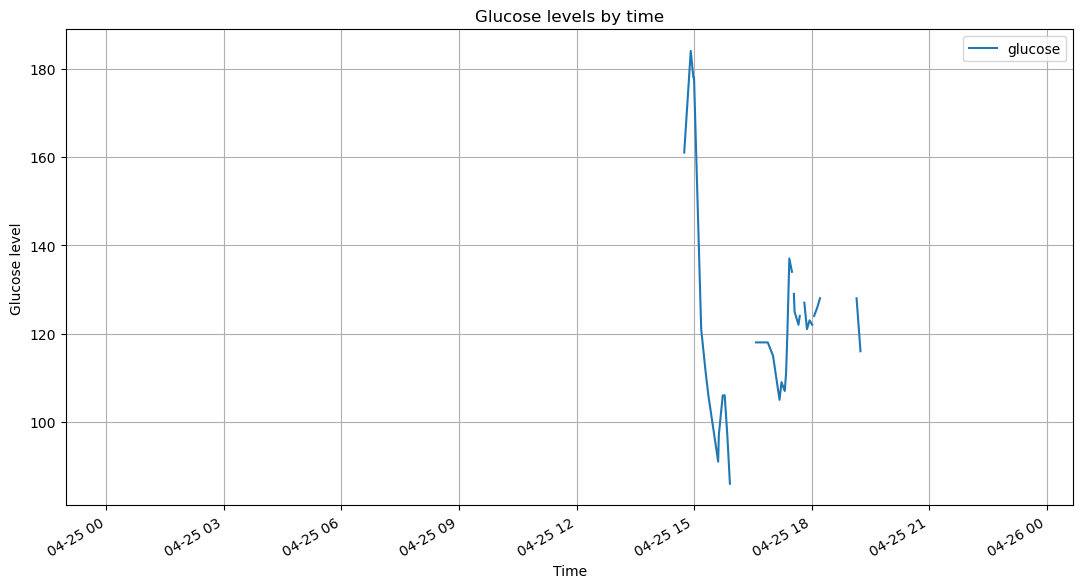

In [95]:
df.plot(x='time', y='glucose', grid=True, figsize=(13, 7))
plt.title('Glucose levels by time')
plt.xlabel('Time')
plt.ylabel('Glucose level')

We have the data for one day (25th Apr). The odd ID number may indicate that device was not on the skin, so there were no measurements until a person put it on around 3 pm.

In [96]:
# check for percentage of missing values
df.isna().mean()

ID            0.000000
time          0.000000
recordtype    0.000000
glucose       0.617647
dtype: float64

In [97]:
print('Percentage of missing glucose values:', df['glucose'].isna().sum()/len(df))

Percentage of missing glucose values: 0.6176470588235294


There are 61.76% of missing values for glucose.

#### Expected outcome percentage missing data
0.6176470588235294

Let's also check the percentage of missing values for the time when the device was on the skin (recordtype is 1):

In [98]:
df_filtered = df[df['recordtype']==1]
df_filtered.sort_values(by='time', ascending=True).head()
df_filtered.tail()

,ID,time,recordtype,glucose
49,3047,2019-04-25 21:42:00,1,126.0
50,3050,2019-04-25 22:02:00,1,130.0
51,3055,2019-04-25 22:37:00,1,114.0
52,3058,2019-04-25 22:51:00,1,106.0
53,3062,2019-04-25 23:31:00,1,111.0


It seems like the person took off the device after midnight, went to sleep, and put it on again at 7am.

Text(0, 0.5, 'Glucose level')

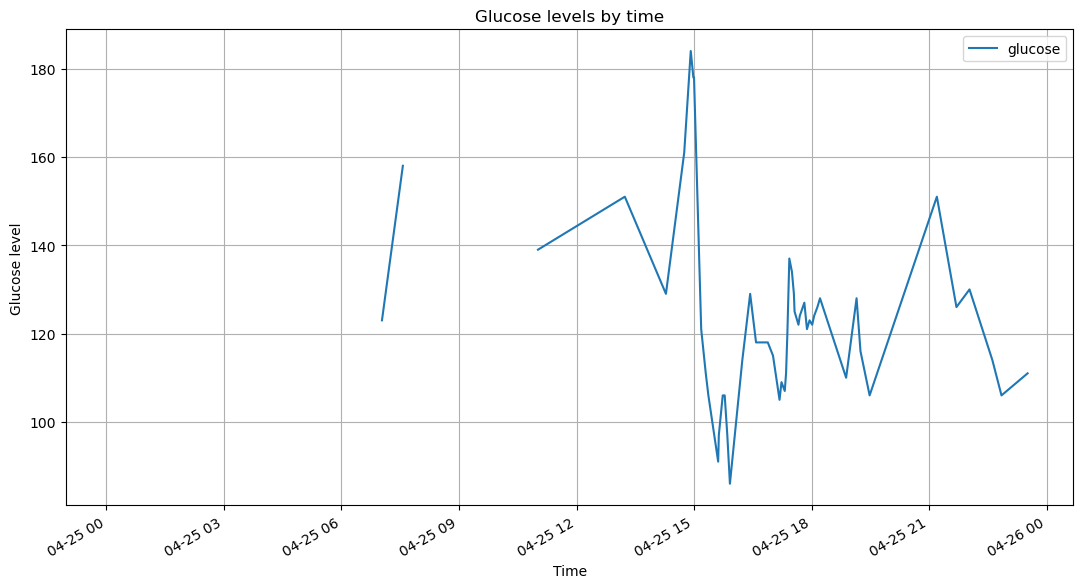

In [99]:
df_filtered.plot(x='time', y='glucose', grid=True, figsize=(13, 7))
plt.title('Glucose levels by time')
plt.xlabel('Time')
plt.ylabel('Glucose level')

From the graph we can actually see that the device was on from around 7am untill 11pm.

In [100]:
print('Percentage of missing glucose values:', df_filtered['glucose'].isna().sum()/len(df_filtered))

Percentage of missing glucose values: 0.037037037037037035


From the time the device was on only 3% of data is missing.

<a name='3'></a>
## Part 4: Interpolate the data

A lot of data is missing. Use interpolation to fill the missing values. Create a new column with the interpolated data. Take an argumentative approach. Select an interpolation method that suits the nature of the data and explain your choice. Mind you that the expected outcome of the interpolation values can differ from the example below

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hints</b></font>
</summary>
<ul><li>use Pandas.DataFrame.interpolate() method</li>
</ul>
</details>

<a name='ex-41'></a>
### Code your solution

Interpolation for the whole dataset:

In [101]:
#CODE YOUR SOLUTION HERE
df = df.set_index('time').sort_values(by='time').reset_index()
df['interpolated'] = df['glucose'].interpolate()
df.head()

,time,ID,recordtype,glucose,interpolated
0,2019-04-25 00:08:00,2845,1,109.0,109.000000
1,2019-04-25 00:14:00,-9223372036854775808,0,NaN,109.466667
2,2019-04-25 00:29:00,-9223372036854775808,0,NaN,109.933333
3,2019-04-25 00:44:00,-9223372036854775808,0,NaN,110.400000
4,2019-04-25 00:50:00,2850,1,NaN,110.866667


#### Example outcome

Interpolation for data when the device was on (recordtype=1) from 7am to midnight:

In [103]:
df_filtered = df_filtered.set_index('time').sort_index().reset_index()
df_filtered = df_filtered[(df_filtered['time'].dt.hour >= 7) & (df_filtered['time'].dt.hour <= 23)]
df_filtered['interpolated'] = df_filtered['glucose'].interpolate()
df_filtered.head()

,time,ID,recordtype,glucose,interpolated
0,2019-04-25 07:02:00,2877,1,123.0,123.0
1,2019-04-25 07:34:00,2881,1,158.0,158.0
2,2019-04-25 08:19:00,2886,1,NaN,148.5
3,2019-04-25 11:01:00,2899,1,139.0,139.0
4,2019-04-25 13:14:00,2909,1,151.0,151.0


<a name='4'></a>
## Part 5: Plot the data

Create a plot with the original data and the interpolated data. Consider what the best representation is for visualisation of actual values and modelled/imputed values. Provide argumentation for the plot of choice. 

Mind you, there are several types of plots. The most used are: 
- Compare values->	Bar, boxplot, violin plot, scatter, line. 
- Show composition-> Stacked bar, pie, mosaic, area, burtin.
- Show distribution-> 	Histogram, density, qqplot, bubble. 
- Analyzing trend-> Line, bar, dual axis 
- Relations-> Scatter, heatmap


### Code your solution

In [19]:
from bokeh.io import output_notebook
from bokeh.plotting import figure, show
from bokeh.layouts import gridplot, row
from bokeh.io import output_notebook
from bokeh.plotting import ColumnDataSource
output_notebook()

Loading BokehJS ...

In [106]:
#CODE YOUR SOLUTION HERE
graph1 = figure(x_axis_type="datetime", title='Glucose levels (raw)', width=500)
graph2 = figure(x_axis_type="datetime", title='Glucose levels (interpolated)', width=500)
graph1.line(df['time'], df['glucose'])
graph2.line(df['time'], df['interpolated'])
show(row(graph1, graph2))


In [107]:
graph1 = figure(x_axis_type="datetime", title='Glucose levels between 7am and 12pm (raw)', width=500)
graph2 = figure(x_axis_type="datetime", title='Glucose levels between 7am and 12pm (interpolated', width=500)
graph1.line(df_filtered['time'], df_filtered['glucose'])
graph2.line(df_filtered['time'], df_filtered['interpolated'])
show(row(graph1, graph2))

<a name='6'></a>
## Part 6: Challenge

It might even be interesting to introduce a widget in which you can select different methods to interpolate.
1. Can you improve the interpolation by choosing an other method?
2. Can you add an rolling mean line? 
2. Can you improve the plot by making it interactive?

<a name='ex-61'></a>
### Code your solution

In [125]:
df['polynom_intepolation'] = df['glucose'].interpolate(method='polynomial', order = 2)
graph1 = figure(x_axis_type="datetime", title='Glucose levels (raw)', width=500)
graph2 = figure(x_axis_type="datetime", title='Glucose levels (interpolated)', width=500)
graph1.line(df['time'], df['glucose'])
graph2.line(df['time'], df['polynom_intepolation'])
show(row(graph1, graph2))

In [128]:
df_filtered['polynom_intepolation'] = df_filtered['glucose'].interpolate(method='polynomial', order = 2)
graph1 = figure(x_axis_type="datetime", title='Glucose levels (raw)', width=500)
graph2 = figure(x_axis_type="datetime", title='Glucose levels (interpolated)', width=500)
graph1.line(df_filtered['time'], df_filtered['glucose'])
graph2.line(df_filtered['time'], df_filtered['polynom_intepolation'])
show(row(graph1, graph2))

In [121]:
#CODE YOUR SOLUTION HERE
df['rolling_mean'] = df['interpolated'].rolling(6).mean()
graph = figure(x_axis_type="datetime", title='Glucose levels through whole dataset')
graph.line(df['time'], df['interpolated'], legend_label = 'Interpolated')
graph.line(df['time'], df['rolling_mean'], line_color = 'orange', legend_label = 'Interpolated, rolling mean')
show(graph)


In [122]:
#CODE YOUR SOLUTION HERE
df_filtered['rolling_mean'] = df_filtered['interpolated'].rolling(6).mean()
graph = figure(x_axis_type="datetime", title='Glucose levels between 7am and 12pm')
graph.line(df_filtered['time'], df_filtered['interpolated'], legend_label = 'Interpolated')
graph.line(df_filtered['time'], df_filtered['rolling_mean'], line_color = 'orange', legend_label = 'Interpolated, rolling mean')
show(graph)